In [53]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [54]:
df=pd.read_csv('train.csv')
train_features=df.iloc[:,[1,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
train_label=df.iloc[:,[0]]
dftest=pd.read_csv('test.csv')
test_features=dftest.iloc[:,[1,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
test_label=dftest.iloc[:,[0]]
model = tf.keras.Sequential()
model.add(Dense(32,activation='relu',input_shape=(24,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [55]:
predictions = model.predict(test_features)
predicted_labels = [0 if prediction[1] > prediction[0] else 1 for prediction in predictions]
correct_predictions = sum([0 if predicted_label == true_label else 1 for predicted_label, true_label in zip(predicted_labels, test_label)])
accuracy = correct_predictions / len(test_label)
print('Accuracy:', accuracy)


Accuracy: 0.0010309278350515464


In [56]:
loss, accuracy = model.evaluate(test_features, test_label)

31/31 [==============================] - 0s 2ms/step - loss: 0.4735


TypeError: cannot unpack non-iterable float object

In [57]:
print(*predictions)

[3.0671705e-05 9.9996936e-01] [9.9999976e-01 2.1472394e-07] [0.8646838 0.1353162] [0.9933483  0.00665163] [9.9999356e-01 6.4270012e-06] [0.78070134 0.21929863] [4.129124e-09 1.000000e+00] [2.9754013e-09 1.0000000e+00] [1.0000000e+00 2.8562262e-19] [1.0000000e+00 5.3847198e-11] [1.0000000e+00 3.3323147e-14] [3.2792832e-05 9.9996722e-01] [0.46714228 0.53285766] [2.5666321e-07 9.9999976e-01] [8.0898099e-05 9.9991906e-01] [1.4399797e-09 1.0000000e+00] [0.00160142 0.9983986 ] [1.0000000e+00 5.4173015e-08] [8.167880e-06 9.999918e-01] [1.0000000e+00 1.4149075e-09] [0.9230313  0.07696869] [6.0878025e-04 9.9939120e-01] [1.0000000e+00 3.6046427e-15] [0.99206513 0.00793487] [3.9787742e-15 1.0000000e+00] [9.999920e-01 7.991383e-06] [9.9977893e-01 2.2106011e-04] [1.0000000e+00 1.2040241e-14] [1.000000e+00 7.717866e-21] [0.9985582  0.00144182] [1.000000e+00 3.729122e-24] [4.5231593e-11 1.0000000e+00] [6.034613e-08 9.999999e-01] [1.000000e+00 2.718933e-09] [0.16513954 0.8348605 ] [1.0000000e+00 1.408

In [58]:
print(len(df.columns))

31


In [59]:
train_features.head(5)

,gender,bmi,waist,fep,tip,pxp,frp,TCP,crp,uap,...,gbp,ghp,c1p,ast,alt,trig,ggt,ins,hdl,fglu
0,0,37.0,108.500000,44,336,13.100000,186,156,1.54,5.7,...,3.4,5.0,0.878,19,14,171,17,7.890000,42,84.900002
1,1,27.9,97.400002,123,320,38.400002,106,182,0.21,5.6,...,2.5,4.9,0.345,30,38,96,20,8.520001,39,94.599998
2,0,17.9,64.199997,28,388,7.200000,127,221,1.54,2.6,...,4.8,9.9,0.021,22,9,76,19,17.410000,77,142.600010
3,0,18.9,71.500000,181,376,48.099998,38,177,0.33,3.5,...,3.1,4.6,0.063,18,8,56,17,4.590000,82,82.800003
4,0,23.9,77.199997,74,368,20.100000,11,218,0.21,2.2,...,3.1,4.4,0.409,16,10,71,8,6.030000,81,85.300003


In [60]:
train_data=df.iloc[:,[7,8,21,22,24,25,27,29]]
train_data.head(5)

,age,bmi,gbp,ghp,ast,alt,ggt,hdl
0,56,37.0,3.4,5.0,19,14,17,42
1,28,27.9,2.5,4.9,30,38,20,39
2,21,17.9,4.8,9.9,22,9,19,77
3,25,18.9,3.1,4.6,18,8,17,82
4,41,23.9,3.1,4.4,16,10,8,81


In [61]:
train_label.head(5)

,us
0,0
1,0
2,1
3,0
4,0


In [62]:
import pandas as pd

# Read the Excel file
dataxl = pd.read_excel('data.xlsx')

# Convert DataFrame to CSV format
dataxl.to_csv('data.csv', index=False)


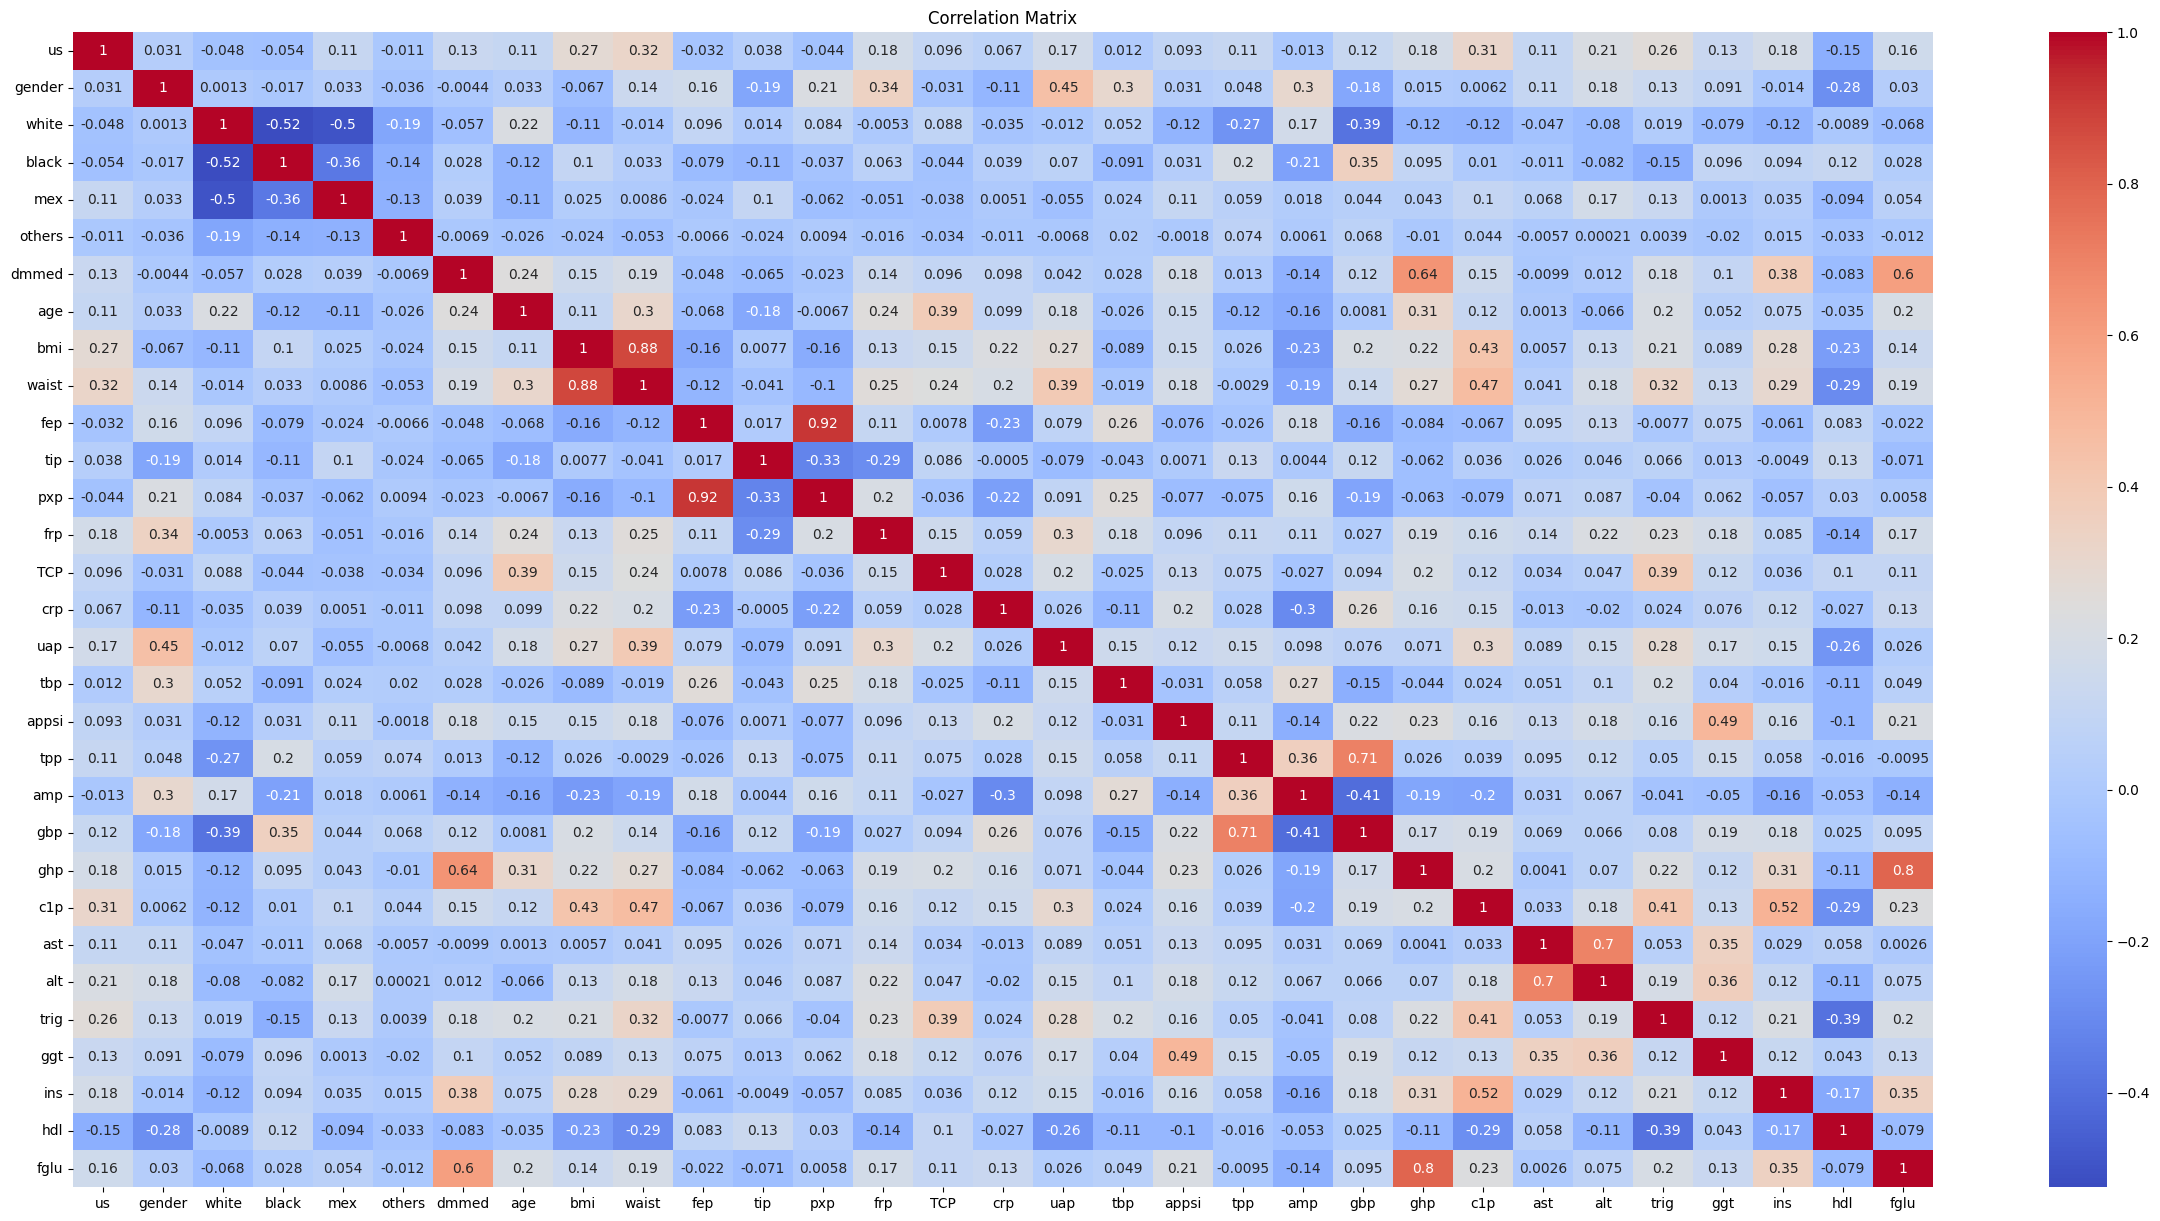

In [63]:
# Step 3: Feature selection (using correlation analysis)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify the features highly correlated with the target
target_corr_threshold = 0.2  # Adjust the threshold as needed
target_correlation = corr_matrix['us']
selected_features = target_correlation[abs(target_correlation) > target_corr_threshold].index.tolist()

# Step 4: Continue with the neural network architecture design and follow the subsequent steps accordingly


In [64]:
print(selected_features)

['us', 'bmi', 'waist', 'c1p', 'alt', 'trig']


In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = data.drop('us', axis=1)
y = data['us']

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importance scores
importance_scores = rf.feature_importances_

# Create a dataframe of feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features
print(feature_importance_df)


   Feature  Importance
8    waist    0.081811
22     c1p    0.079030
27     ins    0.062209
25    trig    0.058600
7      bmi    0.052483
24     alt    0.045948
26     ggt    0.043420
12     frp    0.042478
29    fglu    0.040985
17   appsi    0.037782
13     TCP    0.037653
6      age    0.036918
10     tip    0.035717
21     ghp    0.033563
15     uap    0.033397
28     hdl    0.033277
23     ast    0.033038
9      fep    0.032727
11     pxp    0.032671
18     tpp    0.028796
20     gbp    0.025329
19     amp    0.024199
16     tbp    0.019529
14     crp    0.019466
2    black    0.007726
3      mex    0.006436
1    white    0.004668
0   gender    0.003963
5    dmmed    0.003836
4   others    0.002348


In [66]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features (X) and target variable (y)
X = data.drop('us', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# Get the feature importance based on the absolute value of the PCA components
feature_importance = pd.Series(abs(pca.components_[0]), index=X.columns)

# Sort the features by importance in descending order
sorted_features = feature_importance.sort_values(ascending=False)

# Print the important features
print("Important Features based on PCA:")
print(sorted_features)


Important Features based on PCA:
waist     0.332288
ghp       0.295454
bmi       0.292544
c1p       0.292468
fglu      0.261598
ins       0.259576
trig      0.245834
dmmed     0.244267
appsi     0.211125
uap       0.200958
gbp       0.192783
frp       0.177899
age       0.172806
ggt       0.170720
hdl       0.159083
TCP       0.156609
crp       0.150817
alt       0.147117
amp       0.142123
white     0.103614
tpp       0.087145
fep       0.083483
ast       0.079989
pxp       0.073465
black     0.064137
gender    0.058996
mex       0.052357
tip       0.024883
others    0.002280
tbp       0.001723
dtype: float64


In [67]:
print(data)

      us  gender  white  black  mex  others  dmmed  age        bmi  \
0      0       0      1      0    0       0      0   56  37.000000   
1      0       1      0      0    1       0      0   28  27.900000   
2      1       0      0      1    0       0      1   21  17.900000   
3      0       0      1      0    0       0      0   25  18.900000   
4      0       0      1      0    0       0      0   41  23.900000   
...   ..     ...    ...    ...  ...     ...    ...  ...        ...   
3230   1       1      0      1    0       0      0   29  27.000000   
3231   1       0      0      0    1       0      0   41  27.299999   
3232   0       0      0      1    0       0      0   34  36.700001   
3233   0       0      0      0    0       1      0   42  24.200001   
3234   0       1      0      0    1       0      0   63  21.000000   

           waist  ...  gbp  ghp    c1p  ast  alt  trig  ggt        ins  hdl  \
0     108.500000  ...  3.4  5.0  0.878   19   14   171   17   7.890000   42   
1

In [68]:
# waist     8
# ghp    21   
# bmi    7   
# c1p 22      
# fglu   29   
# ins   27
# trig   25
# alt   24

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1 = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
train_labels = df.iloc[:, [0]]
dftest = pd.read_csv('test.csv')
val_data1 = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
val_labels = dftest.iloc[:, [0]]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data1)

# Scale the training data
train_data = scaler.transform(train_data1)

# Scale the validation data
val_data = scaler.transform(val_data1)

# Reshape the data for CNN input
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model
val_predictions = model.predict(val_data)
val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

precision = precision_score(val_labels, val_predictions)
recall = recall_score(val_labels, val_predictions)
f1 = f1_score(val_labels, val_predictions)
auc_roc = roc_auc_score(val_labels, val_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)


Epoch 1/50
71/71 [==============================] - 2s 10ms/step - loss: 0.5484 - accuracy: 0.7426 - val_loss: 0.5026 - val_accuracy: 0.7722
Epoch 2/50
71/71 [==============================] - 0s 5ms/step - loss: 0.5068 - accuracy: 0.7642 - val_loss: 0.4932 - val_accuracy: 0.7722
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 0.5042 - accuracy: 0.7607 - val_loss: 0.4902 - val_accuracy: 0.7742
Epoch 4/50
71/71 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.7695 - val_loss: 0.4917 - val_accuracy: 0.7691
Epoch 5/50
71/71 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.7687 - val_loss: 0.4869 - val_accuracy: 0.7742
Epoch 6/50
71/71 [==============================] - 0s 4ms/step - loss: 0.4925 - accuracy: 0.7709 - val_loss: 0.4864 - val_accuracy: 0.7753
Epoch 7/50
71/71 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.7709 - val_loss: 0.4909 - val_accuracy: 0.7629
Epoch 8/50
71/71 [=

In [70]:
from keras.models import load_model
model.save('model.h5')

In [71]:
model_final = load_model('model.h5')

model_final.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 6, 32)             128       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 3, 32)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 96)                0         
                                                                 
 dense_21 (Dense)            (None, 64)                6208      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
____________________________________________________

In [72]:
input = [108.5, 5, 37, 0.878, 84.9, 7.89, 171, 14]
input = np.array(input)
input = input.reshape(1,8)
output = model.predict(input)
print(output)

[[1.]]


In [73]:
input = [64.2, 9.9, 17.9, 0.021, 142.6, 17.41,76, 9]
input = np.array(input)
input = input.reshape(1,8)
output = model.predict(input)
print(output)

[[1.]]


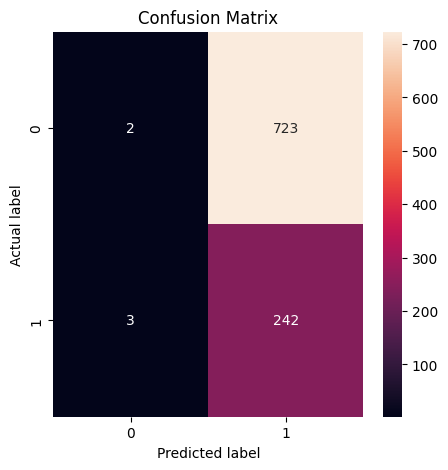

In [74]:
#  print confusion matrix of the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predictions on the test set
test_predictions = model.predict(val_data1)
test_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions

# Get the confusion matrix
cm = confusion_matrix(val_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


              precision    recall  f1-score   support

           0       0.40      0.00      0.01       725
           1       0.25      0.99      0.40       245

    accuracy                           0.25       970
   macro avg       0.33      0.50      0.20       970
weighted avg       0.36      0.25      0.11       970



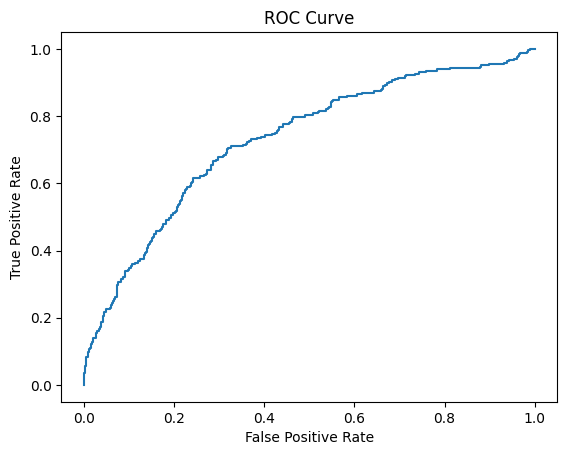

In [75]:

#  print classification report of the test set
from sklearn.metrics import classification_report

# Get the predictions on the test set

test_predictions = model.predict(val_data1)
test_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions

# Print the classification report
print(classification_report(val_labels, test_predictions))

#  print ROC curve of the test set
from sklearn.metrics import roc_curve

# Get the predictions on the test set
test_predictions = model.predict(val_data)

# Get the false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(val_labels, test_predictions)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()